### This is a copy of lstm.ipynb
### It is a sandbox for exploring confusion matrix variations
### In the multi-classification of behaviors





In [161]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Conv2D, Activation
from keras.preprocessing import sequence

In [162]:
from sklearn import metrics
import numpy as np
import pandas as pd

import random
import itertools
import csv

import matplotlib.pyplot as plt

In [163]:
# set parameters and load data
epochs = 100
batch_size = 10
time_steps = 6
features = 300

features_path = 'input_vol.npy'
labels_path = 'input_label.npy'

X = np.load(features_path)
Y = np.load(labels_path)
print(X.shape)
print(Y.shape)

####################################################
####################################################

behaviors_path = 'behavior.csv'
behaviors =[]
with open(behaviors_path) as f:
    reader = csv.reader(f)
    next(reader) # skip header
    behaviors = [r for r in reader]

B = np.array([row[1] for row in behaviors])

print(B.shape)

(370, 6, 300)
(370, 4)
(370,)


In [164]:
B[0:3]

array([' chinese fire drill ', 'abusive cycle', 'action assembly theory'],
      dtype='<U50')

In [167]:
# randomly shuffle data
s = np.arange(X.shape[0])
np.random.shuffle(s)

B = B[s]
X = X[s]
Y = Y[s]

In [168]:
# split data into train and test sets
train_behavior = B[0:296]
test_behavior = B[297:369]

train_X = X[0:296,:,:]
test_X = X[297:369,:,:]

train_Y = Y[0:296,:]
test_Y = Y[297:369,:]

In [169]:
train_behavior[0:20]

array(['poor persuasive ability', 'feelings of emptiness', 'kick door',
       'prolonged emotional states', 'choke', 'hoovers   hoovering',
       'insult girlfriend', 'inventive', 'circular conversations',
       'frequent pornography usage', 'introverted', 'illicit drug use',
       'hurt', 'extreme jealousy', 'bossy', 'intimidate', 'depression',
       'domestic theft', 'yell at girlfriend', 'beat'],
      dtype='<U50')

In [170]:
#test_behavior.head()

In [171]:
#train_index

In [172]:
#test_index

**BUILD LSTM LAYERS:**

In [174]:
# build LSTM layers and train model
model = Sequential()
model.add(LSTM(100, dropout= 0.2, input_shape=(time_steps, features)))
model.add(Activation('relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
Total params: 160,804
Trainable params: 160,804
Non-trainable params: 0
_________________________________________________________________
None


### ONLY RUN THE MODEL.FIT IF YOU WANT TO TRAIN THE LSTM FROM SCRATCH

In [175]:
model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=epochs, batch_size=batch_size)

Train on 296 samples, validate on 72 samples
Epoch 1/100
296/296 [==============================] - 2s 5ms/step - loss: 0.6680 - acc: 0.6723 - val_loss: 0.6088 - val_acc: 0.7118
Epoch 2/100
296/296 [==============================] - 0s 1ms/step - loss: 0.5849 - acc: 0.7061 - val_loss: 0.5599 - val_acc: 0.7118
Epoch 3/100
296/296 [==============================] - 0s 1ms/step - loss: 0.5361 - acc: 0.7204 - val_loss: 0.5286 - val_acc: 0.7535
Epoch 4/100
296/296 [==============================] - 0s 1ms/step - loss: 0.4927 - acc: 0.7593 - val_loss: 0.5123 - val_acc: 0.7743
Epoch 5/100
296/296 [==============================] - 0s 1ms/step - loss: 0.4492 - acc: 0.7846 - val_loss: 0.4674 - val_acc: 0.7847
Epoch 6/100
296/296 [==============================] - 0s 1ms/step - loss: 0.3981 - acc: 0.8176 - val_loss: 0.4511 - val_acc: 0.8229
Epoch 7/100
296/296 [==============================] - 0s 1ms/step - loss: 0.3478 - acc: 0.8505 - val_loss: 0.4720 - val_acc: 0.7951
Epoch 8/100
296/296 [===

Epoch 62/100
296/296 [==============================] - 0s 2ms/step - loss: 0.0356 - acc: 0.9873 - val_loss: 1.1365 - val_acc: 0.7431
Epoch 63/100
296/296 [==============================] - 0s 2ms/step - loss: 0.0340 - acc: 0.9899 - val_loss: 1.1453 - val_acc: 0.7431
Epoch 64/100
296/296 [==============================] - 0s 1ms/step - loss: 0.0223 - acc: 0.9916 - val_loss: 1.1754 - val_acc: 0.7326
Epoch 65/100
296/296 [==============================] - 0s 1ms/step - loss: 0.0265 - acc: 0.9899 - val_loss: 1.1526 - val_acc: 0.7465
Epoch 66/100
296/296 [==============================] - 0s 1ms/step - loss: 0.0287 - acc: 0.9890 - val_loss: 1.2117 - val_acc: 0.7431
Epoch 67/100
296/296 [==============================] - 0s 1ms/step - loss: 0.0313 - acc: 0.9890 - val_loss: 1.1420 - val_acc: 0.7674
Epoch 68/100
296/296 [==============================] - 0s 1ms/step - loss: 0.0277 - acc: 0.9907 - val_loss: 1.1859 - val_acc: 0.7569
Epoch 69/100
296/296 [==============================] - 0s 1ms

**OPTIONAL SAVE (careful! don't overwrite your previous save)**

In [176]:
# save model

model.save('model_interro.h5')

np.save('train_X_interro',train_X)
np.save('train_y_interro',train_Y)

np.save('test_X_interro',test_X)
np.save('test_Y_interro',test_Y)

np.save('train_B_interro',train_behavior)
np.save('test_B_interro', test_behavior)


### LOAD SAVED MODEL HERE


- load model and data, otherwise accuracies are going to be off

In [177]:
# load model & data/shuffle it was generated with:
model = load_model('model_interro.h5')

train_X = np.load('train_X_interro.npy')
train_Y = np.load('train_Y_interro.npy')

test_X = np.load('test_X_interro.npy')
test_Y = np.load('test_Y_interro.npy')

train_behavior = np.load('train_B_interro.npy')
test_behavior = np.load('test_B_interro.npy')

In [178]:
# score model and log accuracy
scores = model.evaluate(test_X, test_Y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 75.00%


In [179]:
# get predictions
# each row corresponds to a behavior; each row corresponds to the classification for a given type of violence
y_pred = model.predict(test_X)
y_pred[0:5]

array([[  8.31e-01,   1.22e-03,   3.32e-02,   3.51e-05],
       [  2.20e-04,   5.26e-04,   2.73e-04,   6.27e-05],
       [  3.00e-03,   5.31e-04,   8.58e-01,   9.97e-01],
       [  5.18e-04,   9.53e-03,   9.99e-01,   9.88e-01],
       [  2.62e-02,   9.96e-01,   9.99e-01,   1.02e-03]], dtype=float32)

In [180]:
# create list of classes for input to confusion matrix
# need to compe back and automate this.
all_permutations = [[0,0,0,0],[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1],[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]]
classes = []
for label in all_permutations:
    val = ""
    for x in label:
        val = val + str(int(x))
    classes.append(val)
    
classes

['0000',
 '1000',
 '0100',
 '0010',
 '0001',
 '1100',
 '1010',
 '1001',
 '0110',
 '0101',
 '0011',
 '1110',
 '1101',
 '1011',
 '0111',
 '1111']

In [181]:
len(classes)

16

In [182]:
# create y true and y predictions to input into confusion matrix
# values must be strings or ints for scikit-learn's confusion matrix, so we must transform them

yt = []
for label in test_Y:
    val = ""
    for x in label:
        val = val + str(int(x))
    yt.append(val)
    
yp = []
for label in y_pred:
    val = ""
    for x in label:
        
        val = val + str(int(0 if x < 0.8 else 1))
    yp.append(val)

print(yp)

['1000', '0000', '0011', '0011', '0110', '0000', '1000', '0000', '0000', '0000', '0100', '0100', '0000', '0111', '1000', '0001', '0000', '0011', '0000', '1010', '0010', '0100', '0000', '0000', '0101', '0000', '0101', '0101', '0001', '0000', '0010', '0000', '0100', '0000', '0000', '0011', '0010', '0000', '0000', '0001', '1000', '0100', '1001', '0110', '0000', '0101', '0000', '0101', '0000', '0000', '0000', '1000', '0010', '1010', '1000', '0000', '0000', '0011', '0001', '1000', '0010', '0010', '0001', '0000', '0010', '0000', '0000', '1110', '0000', '1010', '0000', '0000']


In [183]:
confusion = metrics.confusion_matrix(yt, yp, labels = classes)
confusion

array([[13,  4,  2,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  2,  1,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,

In [184]:
yp[0]

'1000'

In [185]:
y_pred[0]

array([  8.31e-01,   1.22e-03,   3.32e-02,   3.51e-05], dtype=float32)

In [186]:
###------Need to create a function that lets you pick one of these pairings
###------and then it returns to you the corresponding entries

In [326]:
## TODO - get violence types, replace the 'V1'
## TODO - generalize number of violence columns
## TODO - distinguish between Violence_Cols for test and pred, for future dataframe concatenating

# Pretends 4 violence types "V1" through "V4"
# Create a list with the names for pandas frames
# This isn't quite implemented in any useful way. Yes.
V1 = 'V1'
V2 = 'V2'
V3 = 'V3'
V4 = 'V4'
Violence_Cols = [V1, V2, V3, V4]

# Create a pandas DF of the test labels
Y_test_df = pd.DataFrame(test_Y)
Y_pred_df = pd.DataFrame(y_pred)

B_test_df = pd.DataFrame(test_behavior)

In [327]:
# Create column dataframes out of the yt and yp lists,
# which are in the format ['0000','1001', ..etc
Y_t = pd.DataFrame(yt, columns=['Y_t'])
Y_p = pd.DataFrame(yp, columns=['Y_p'])
display(Y_t.head(2))
display(Y_p.head(2))

,Y_t
0,1000
1,0001


,Y_p
0,1000
1,0000


In [328]:
display(Y_test_df.head(2))

Y_test_df = Y_test_df[:].astype('int')

display(Y_test_df.head(2))

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0


,0,1,2,3
0,1,0,0,0
1,0,0,0,1


In [329]:
display(Y_pred_df.head(2))

# The threshold was semi-arbitrary. Can be examined later if we choose.
Y_pred_df = Y_pred_df.applymap(lambda x: 0 if x < 0.8 else 1)

display(Y_pred_df.head(2))

,0,1,2,3
0,0.830666,0.001217,0.033197,0.000035
1,0.000220,0.000526,0.000273,0.000063


,0,1,2,3
0,1,0,0,0
1,0,0,0,0


In [330]:
"""# Predicted values come as floats between 0 and 1, need to round before setting type to int
y_pred_df = y_pred_df.apply(lambda x: np.rint(x)) #<-- rounds to nearest
y_pred_df = y_pred_df[Violence_Cols].astype('int')
"""


"# Predicted values come as floats between 0 and 1, need to round before setting type to int\ny_pred_df = y_pred_df.apply(lambda x: np.rint(x)) #<-- rounds to nearest\ny_pred_df = y_pred_df[Violence_Cols].astype('int')\n"

In [331]:
# Create a function that lets you input the labels as a string i.e. '1000'
# and either the test labels or predicted labels
# and it will give a boolean column vector that can be used to select
# rows from the related dataframes.

def get_row_mask_by_labelset(label_set, df):
    """Input: a full label set for a single row, and
    the dataframe to match against.
    Returns: a boolean mask for the data frame that 
    can be used to filter out those rows.
    """
    categories_string = label_set
    char_num = 0
    
    compound_conditional = True

    # use for loop to chain AND for each character
    for each_char in categories_string:
        loop_cond = (df.iloc[:,char_num] == int(each_char))
        compound_conditional = compound_conditional & loop_cond
        char_num += 1
    
    return compound_conditional

#################################################################
#################################################################

# Create a function that uses the boolean mask with a data frame to return the rows

def get_rows_masked_by_labelset(label_set,df):
    """Returns the rows where the label set matches the labels in the data frame.
    """
    return df[get_row_mask_by_labelset(label_set,df)]

#################################################################
#################################################################

def get_row_mask_for_2dfs_and_2labels(label_set1,df1,label_set2,df2):
    """Returns a row mask where (masks of test AND predicted labels) are true. 
    """
    mask = get_row_mask_by_labelset(label_set1, df1) & get_row_mask_by_labelset(label_set2, df2)
    return mask

In [332]:
get_row_mask_by_labelset('0000', Y_pred_df)[0:10]

0    False
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8     True
9     True
dtype: bool

In [333]:
# 0010 w/ test labels
get_rows_masked_by_labelset('0000', Y_pred_df)[0:10]

,0,1,2,3
1,0,0,0,0
5,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0
12,0,0,0,0
16,0,0,0,0
18,0,0,0,0
22,0,0,0,0
23,0,0,0,0


In [334]:
# 0010 w/ predicted labels
get_rows_masked_by_labelset('0010',Y_pred_df)

,0,1,2,3
20,0,0,1,0
30,0,0,1,0
36,0,0,1,0
52,0,0,1,0
60,0,0,1,0
61,0,0,1,0
64,0,0,1,0


In [335]:
Y_test_df[get_row_mask_for_2dfs_and_2labels('0100',Y_test_df,'0000',Y_pred_df)][0:10]

,0,1,2,3
16,0,1,0,0
33,0,1,0,0
46,0,1,0,0


In [336]:
# plot confusion matrix with class labels

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[13  4  2  1  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 5  1  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  1  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  2  0  0  0  0  1  0  0  0  0  1  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  2  1  1  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  3  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]]


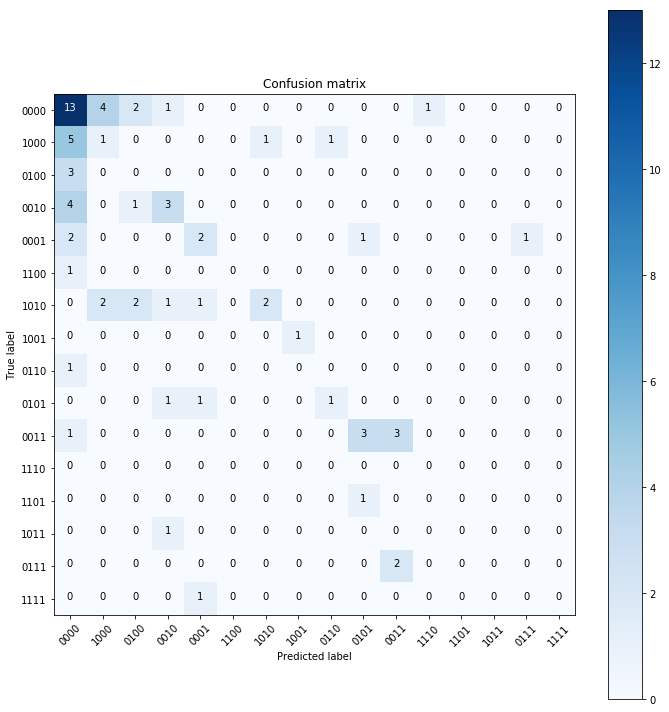

In [337]:
# compute confusion matrix
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion, classes=classes, title='Confusion matrix')

plt.show()

In [253]:
def retrieve_behavior_name(V1,V2,V3,V4,test_Y_df,V1_,V2_,V3_,V4_,pred_Y_df,behaviors):
    """Enter the test and predicted labels for the test and predicted dataframes, as well as
    the behaviors list itself. Output is the rows of behaviors where the test labels are true
    and corresponding prediction labels are true.
    
    THis allows comparison of behavior names for classified and miss-classified examples.
    """
    test_mask = (test_Y_df[0]==V1) & (test_Y_df[1]==V2) & (test_Y_df[2]==V3) & (test_Y_df[3]==V4)
    pred_mask = (pred_Y_df[0]==V1_) & (pred_Y_df[1]==V2_) & (pred_Y_df[2]==V3_) & (pred_Y_df[3]==V4_)
    
    #print(test_mask[test_mask==True])
    #print(pred_mask[pred_mask==True])
    #print(pred_mask[(test_mask==True) & (pred_mask==True)])
    
    #This part doesn't work yet:
    indexes_of_interest = test_mask[(test_mask==True) & (pred_mask==True)].index
    
    #print(indexes_of_interest)
    return behaviors.iloc[indexes_of_interest]
    

### Try it out:

In [256]:
retrieve_behavior_name(0,1,0,0,Y_test_df,0,0,0,0,Y_pred_df,B_test_df)

,0
16,passive
33,normalizing
46,making fun


In [345]:
retrieve_behavior_name(0,0,1,1,Y_test_df,0,0,1,1,Y_pred_df,B_test_df)

,0
2,hold against wall
3,push out of car
57,kick furniture


In [346]:
retrieve_behavior_name(0,0,1,1,Y_test_df,0,0,1,0,Y_pred_df,B_test_df)

,0


In [350]:
def get_concat_classifiers(test_label_set, test_df, pred_label_set, pred_label_df):
    """Uses masks to expose the rows where the test data frame has the first set of labels
    and the predicted data frame has the second set of labels. 
    Outputs the contatenation of the two.
    
    """
    
    tdf = test_df
    pdf = pred_label_df
    
    tlbl = test_label_set
    plbl = pred_label_set
    
    mask = get_row_mask_for_2dfs_and_2labels(tlbl, tdf, plbl, pdf)
       
    return pd.concat([tdf[mask],pdf[mask]], axis=1)

In [351]:
# The hand-input numbers may change if the data is reshuffled
get_concat_classifiers('0010',Y_test_df,'0000',Y_pred_df)

,0,1,2,3,0,1,2,3
9,0,0,1,0,0,0,0,0
12,0,0,1,0,0,0,0,0
34,0,0,1,0,0,0,0,0
55,0,0,1,0,0,0,0,0


In [352]:
test_Y_df[Violence_Cols[0]].sum()
#There are 29 positives, but if the data is reshuffled this will change.


# The labels below should be [0, 1] or [No, Yes]

21

Confusion matrix, without normalization
[[46  5]
 [14  7]]


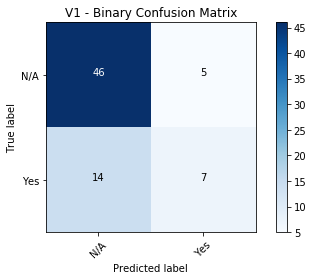

Confusion matrix, without normalization
[[48 12]
 [10  2]]


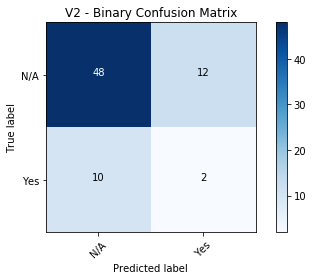

Confusion matrix, without normalization
[[37  7]
 [16 12]]


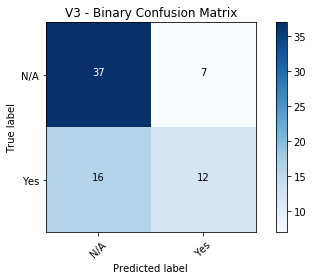

Confusion matrix, without normalization
[[49  1]
 [ 6 16]]


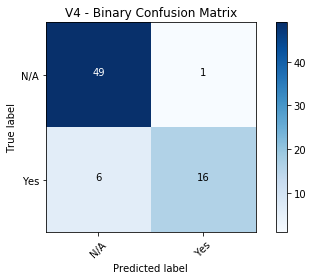

In [286]:
index = 0
for each_cat in Violence_Cols:
    #conf_mat = metrics.confusion_matrix(Y_test_df[each_cat],Y_pred_df[each_cat])
    conf_mat = metrics.confusion_matrix(Y_test_df[index],Y_pred_df[index])
    plot_confusion_matrix(conf_mat, ['N/A', 'Yes'], title = (str(each_cat) + " - Binary Confusion Matrix" ))
    plt.show()
    index += 1

In [354]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [484]:
def get_class_statistics(Y_test_df,Y_pred_df):
    """Returns Accuracy, Precision, Recall and F1 for every class
    in Y_test_df and Y_pred_df dataframes.
    
    The can be used to get the same results across classes for each
    individual behavior by using the transpost of both frames. (e.g. Y_test_df.T)
    
    Needs implemented: return the scores as a dataframe
    
    """
    classes = range(0,Y_test_df.shape[1])  #Y_test_df is 370 x 4
    
    for index in classes:
        ac = accuracy_score(Y_test_df[index],Y_pred_df[index])
        pr = precision_score(Y_test_df[index],Y_pred_df[index])
        rc = recall_score(Y_test_df[index],Y_pred_df[index])
        f1 = f1_score(Y_test_df[index],Y_pred_df[index])  
        
        print(str(index) + " | Acc: %.2f" % ac + " | Prec: %.2f" % pr + \
          " | Rec: %.2f" % rc + " | f1: %.2f" % f1)
        
    return

In [486]:
get_class_statistics(Y_test_df, Y_pred_df)

0 | Acc: 0.74 | Prec: 0.58 | Rec: 0.33 | f1: 0.42
1 | Acc: 0.69 | Prec: 0.14 | Rec: 0.17 | f1: 0.15
2 | Acc: 0.68 | Prec: 0.63 | Rec: 0.43 | f1: 0.51
3 | Acc: 0.90 | Prec: 0.94 | Rec: 0.73 | f1: 0.82


In [443]:
def count_incorrect_entries(test_labels,pred_labels,axis=0):
    """Returns the incorrect entry (misclassified) count for each violence classifier (axis=0)
    or each behavior (axis=1). Input are 2 data frames of the same size.
    Output is a dataframe that returns the classes as indices.
    """
    return ((pred_labels - test_labels)**2).sum(axis=axis)

In [452]:
count_incorrect_entries(Y_test_df, Y_pred_df)

0    19
1    22
2    23
3     7
dtype: int64

In [453]:
# The maximum misclassifications observed for a behavior
count_incorrect_entries(Y_test_df, Y_pred_df, axis=1).max()

3

In [465]:
#None here...
Y_pred_df.loc[row_sum_inccorect == 4].head()

,0,1,2,3


In [466]:
Y_pred_df.loc[row_sum_inccorect == 3].head()

,0,1,2,3
4,0,1,1,0
10,0,1,0,0
20,0,0,1,0
28,0,0,0,1
41,0,1,0,0


In [467]:
Y_pred_df.loc[row_sum_inccorect == 2].head()

,0,1,2,3
11,0,1,0,0
13,0,1,1,1
24,0,1,0,1
26,0,1,0,1
31,0,0,0,0


In [468]:
Y_pred_df.loc[row_sum_inccorect == 1].head()

,0,1,2,3
1,0,0,0,0
5,0,0,0,0
6,1,0,0,0
9,0,0,0,0
12,0,0,0,0


In [469]:
Y_pred_df.loc[row_sum_inccorect == 0].head()

,0,1,2,3
0,1,0,0,0
2,0,0,1,1
3,0,0,1,1
7,0,0,0,0
8,0,0,0,0


In [471]:
## Calculate the Acc, Pr, and Recall across classes for a single behavior.
## The Pr and Re do offer a bit of information about false positives and negatives
## But this will become more informative and interesting as classes increase.

collect_scores = pd.DataFrame()
row_scores_columns = ['Num_Incorrect', 'X-Accuracy', 'X-Precision', 'X-Recall']

for each_row_idx in Y_test_df.index:
    #print(each_row_idx)
    
    incorrect = ((Y_pred_df - Y_test_df)**2).sum(axis=1)
    
    Xac = accuracy_score(Y_test_df.iloc[each_row_idx], Y_pred_df.iloc[each_row_idx])
    Xpr = precision_score(Y_test_df.iloc[each_row_idx], Y_pred_df.iloc[each_row_idx])
    Xre = recall_score(Y_test_df.iloc[each_row_idx], Y_pred_df.iloc[each_row_idx])
    
    collect_scores[each_row_idx] = [incorrect[each_row_idx].astype('int'), Xac, Xpr, Xre]
    
collect_scores = collect_scores.T
collect_scores.columns = row_scores_columns
collect_scores.head()

C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Ben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.00,1.0,1.0
1,1.0,0.75,0.0,0.0
2,0.0,1.00,1.0,1.0
3,0.0,1.00,1.0,1.0
4,3.0,0.25,0.0,0.0


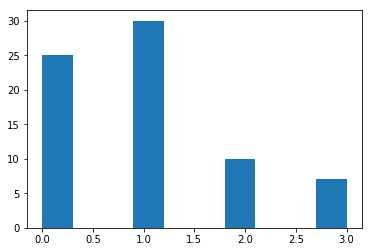

In [472]:
#scaling int he plot is a bit strang
plt.hist(collect_scores['Num_Incorrect'])
plt.show()

In [473]:
collect_scores.head()

,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,0.0,1.00,1.0,1.0
1,1.0,0.75,0.0,0.0
2,0.0,1.00,1.0,1.0
3,0.0,1.00,1.0,1.0
4,3.0,0.25,0.0,0.0


In [474]:
combined = pd.concat([B_test_df,Y_t,Y_p,Y_test_df,Y_pred_df,collect_scores],axis=1)

In [475]:
combined.head()

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,oppositional defiant disorder,1000,1000,1,0,0,0,1,0,0,0,0.0,1.00,1.0,1.0
1,controlling,0001,0000,0,0,0,1,0,0,0,0,1.0,0.75,0.0,0.0
2,hold against wall,0011,0011,0,0,1,1,0,0,1,1,0.0,1.00,1.0,1.0
3,push out of car,0011,0011,0,0,1,1,0,0,1,1,0.0,1.00,1.0,1.0
4,age 17 19,1000,0110,1,0,0,0,0,1,1,0,3.0,0.25,0.0,0.0


In [476]:
combined.loc[combined["Num_Incorrect"]==4]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall


In [477]:
combined.loc[combined["Num_Incorrect"]==3]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
4,age 17 19,1000,0110,1,0,0,0,0,1,1,0,3.0,0.25,0.0,0.00
10,animal abuse,1010,0100,1,0,1,0,0,1,0,0,3.0,0.25,0.0,0.00
20,stalking,0101,0010,0,1,0,1,0,0,1,0,3.0,0.25,0.0,0.00
28,push partner,1111,0001,1,1,1,1,0,0,0,1,3.0,0.25,1.0,0.25
41,risk taker,1010,0100,1,0,1,0,0,1,0,0,3.0,0.25,0.0,0.00
58,visible prolonged sadness,1010,0001,1,0,1,0,0,0,0,1,3.0,0.25,0.0,0.00
67,hold minded,0000,1110,0,0,0,0,1,1,1,0,3.0,0.25,0.0,0.00


In [478]:
combined.loc[combined["Num_Incorrect"]==2]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
11,express harming in media,0010,0100,0,0,1,0,0,1,0,0,2.0,0.5,0.000000,0.000000
13,sexual compulsivity,0001,0111,0,0,0,1,0,1,1,1,2.0,0.5,0.333333,1.000000
24,domestic abuse,0011,0101,0,0,1,1,0,1,0,1,2.0,0.5,0.500000,0.500000
26,throw something,0011,0101,0,0,1,1,0,1,0,1,2.0,0.5,0.500000,0.500000
31,domestic violence,0011,0000,0,0,1,1,0,0,0,0,2.0,0.5,0.000000,0.000000
38,self harm,0110,0000,0,1,1,0,0,0,0,0,2.0,0.5,0.000000,0.000000
43,grab clothing,0101,0110,0,1,0,1,0,1,1,0,2.0,0.5,0.500000,0.500000
47,slap,0011,0101,0,0,1,1,0,1,0,1,2.0,0.5,0.500000,0.500000
50,low interest in education,1100,0000,1,1,0,0,0,0,0,0,2.0,0.5,0.000000,0.000000
61,drunk,1011,0010,1,0,1,1,0,0,1,0,2.0,0.5,1.000000,0.333333


In [479]:
combined.loc[combined["Num_Incorrect"]==1]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
1,controlling,0001,0000,0,0,0,1,0,0,0,0,1.0,0.75,0.0,0.000000
5,not my fault syndrome,1000,0000,1,0,0,0,0,0,0,0,1.0,0.75,0.0,0.000000
6,low ambition,0000,1000,0,0,0,0,1,0,0,0,1.0,0.75,0.0,0.000000
9,inadequate physical activity,0010,0000,0,0,1,0,0,0,0,0,1.0,0.75,0.0,0.000000
12,poor mental health score,0010,0000,0,0,1,0,0,0,0,0,1.0,0.75,0.0,0.000000
14,sense of entitlement,0000,1000,0,0,0,0,1,0,0,0,1.0,0.75,0.0,0.000000
16,passive,0100,0000,0,1,0,0,0,0,0,0,1.0,0.75,0.0,0.000000
17,hair pull,0111,0011,0,1,1,1,0,0,1,1,1.0,0.75,1.0,0.666667
19,manic,1000,1010,1,0,0,0,1,0,1,0,1.0,0.75,0.5,1.000000
21,blaming,0000,0100,0,0,0,0,0,1,0,0,1.0,0.75,0.0,0.000000


In [480]:
combined.loc[combined["Num_Incorrect"]==0]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
0,oppositional defiant disorder,1000,1000,1,0,0,0,1,0,0,0,0.0,1.0,1.0,1.0
2,hold against wall,0011,0011,0,0,1,1,0,0,1,1,0.0,1.0,1.0,1.0
3,push out of car,0011,0011,0,0,1,1,0,0,1,1,0.0,1.0,1.0,1.0
7,silent treatment,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
8,asccismus,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
15,isolate partner from family,0001,0001,0,0,0,1,0,0,0,1,0.0,1.0,1.0,1.0
18,calculus of concepts,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
23,behavioral urbanism,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
29,splitting,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
30,sleep deprivation,0010,0010,0,0,1,0,0,0,1,0,0.0,1.0,1.0,1.0


In [482]:
combined.loc[(combined['Y_t']=='0000') & (combined['Y_p']=='0000') ]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
7,silent treatment,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
8,asccismus,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
18,calculus of concepts,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
23,behavioral urbanism,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
29,splitting,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
37,behavioral contagion,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
44,mirroring,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
48,cultural universal also human universal,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
49,gaslighting,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0
63,pathological lying,0000,0000,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0


In [483]:
combined.loc[combined['Num_Incorrect']==3]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
4,age 17 19,1000,0110,1,0,0,0,0,1,1,0,3.0,0.25,0.0,0.00
10,animal abuse,1010,0100,1,0,1,0,0,1,0,0,3.0,0.25,0.0,0.00
20,stalking,0101,0010,0,1,0,1,0,0,1,0,3.0,0.25,0.0,0.00
28,push partner,1111,0001,1,1,1,1,0,0,0,1,3.0,0.25,1.0,0.25
41,risk taker,1010,0100,1,0,1,0,0,1,0,0,3.0,0.25,0.0,0.00
58,visible prolonged sadness,1010,0001,1,0,1,0,0,0,0,1,3.0,0.25,0.0,0.00
67,hold minded,0000,1110,0,0,0,0,1,1,1,0,3.0,0.25,0.0,0.00


In [487]:
combined.loc[(combined['Y_t']=='0111') & (combined['Y_p']=='0011') ]

,0,Y_t,Y_p,0,1,2,3,0,1,2,3,Num_Incorrect,X-Accuracy,X-Precision,X-Recall
17,hair pull,0111,0011,0,1,1,1,0,0,1,1,1.0,0.75,1.0,0.666667
35,slam against wall,0111,0011,0,1,1,1,0,0,1,1,1.0,0.75,1.0,0.666667
